In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
Boston_df = pd.read_csv("HousingData.csv")

In [ ]:
print(Boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
print(Boston_df.shape)

(506, 14)


# Data preprocessing

In [ ]:
Boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.CRIM)


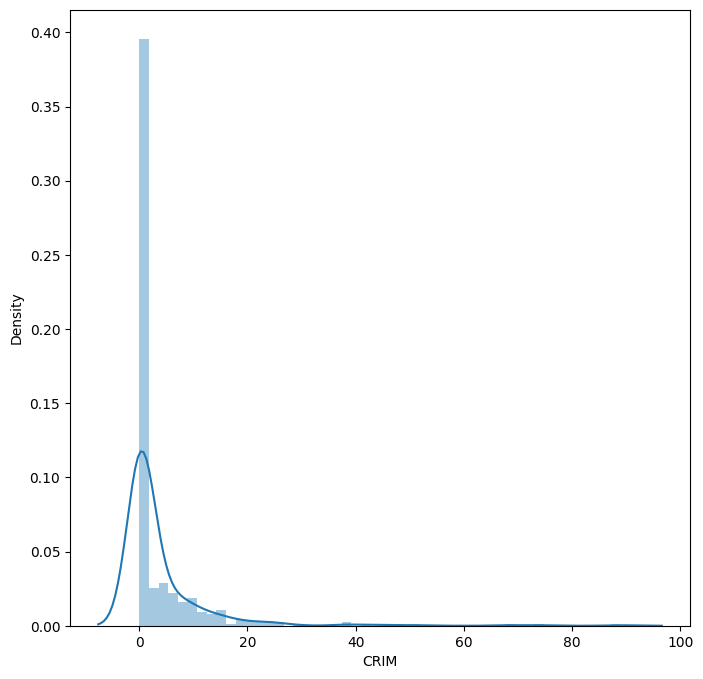

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.ZN)


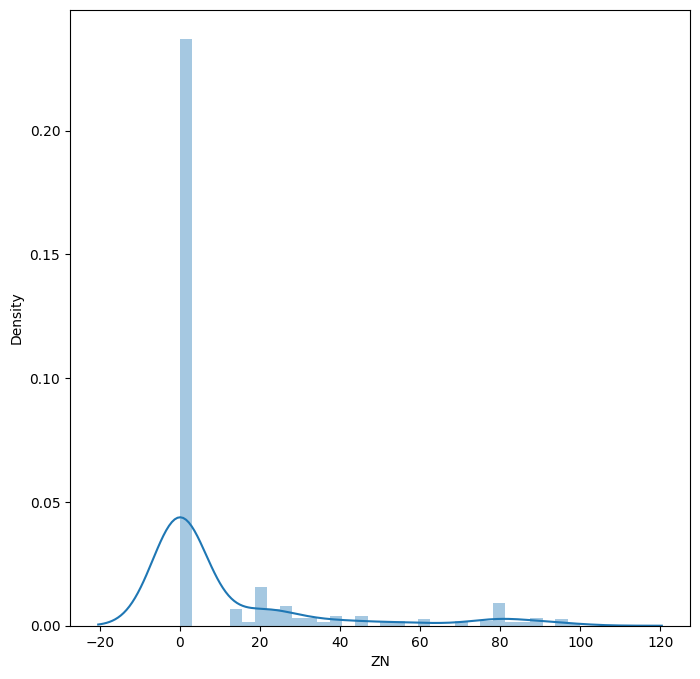

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.INDUS)


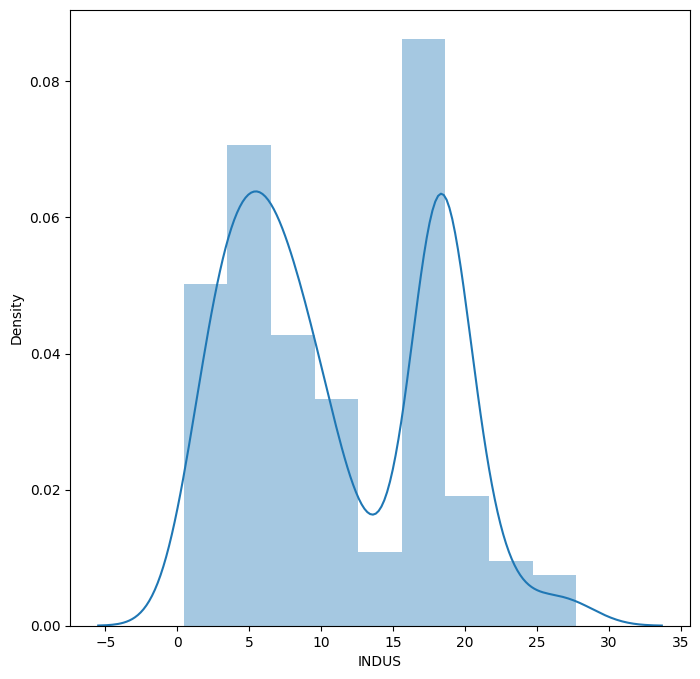

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.CHAS)


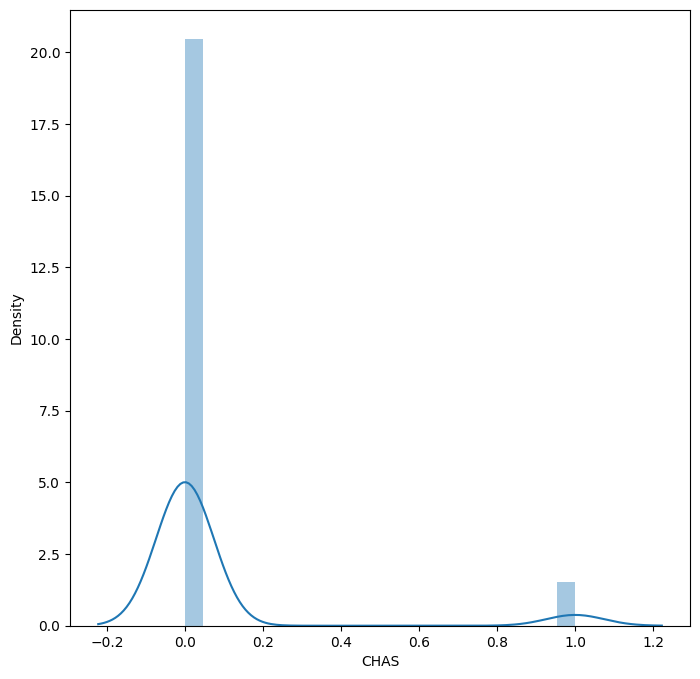

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.AGE)


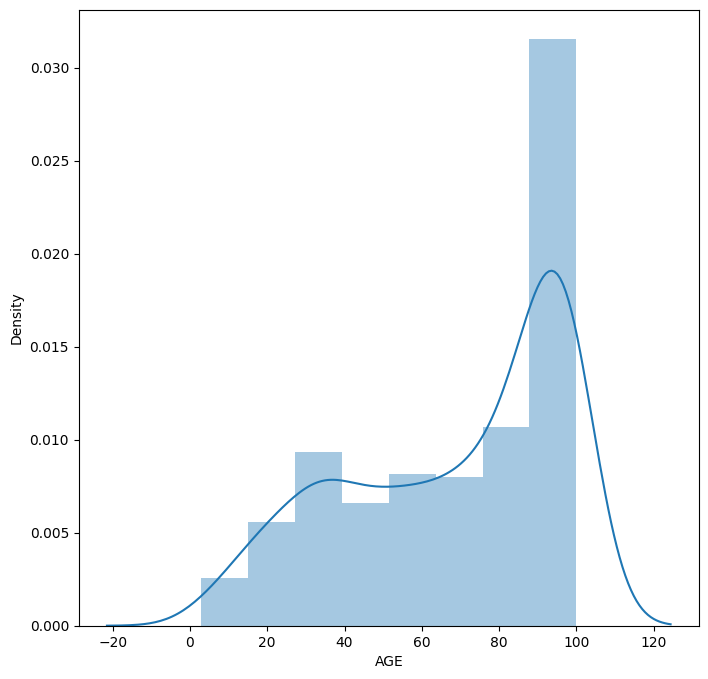

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\1919813569.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston_df.LSTAT)


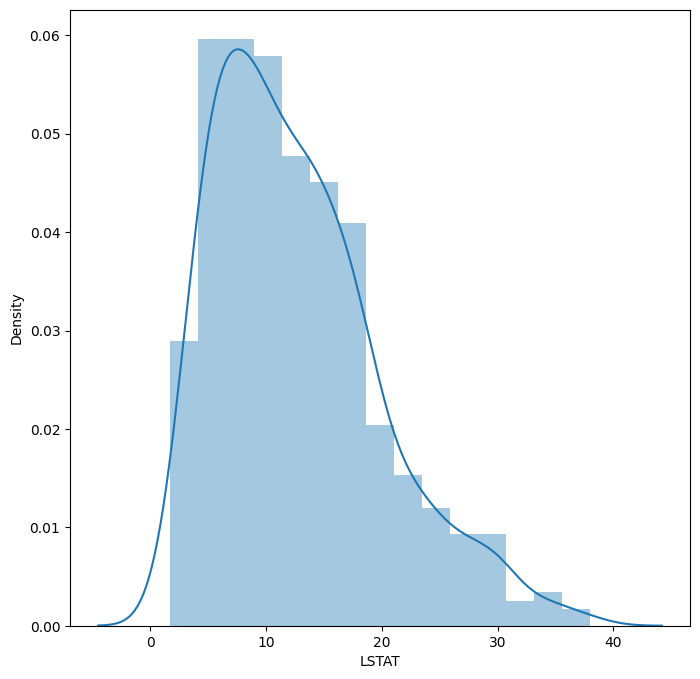

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.CRIM)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.ZN)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.INDUS)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.CHAS)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.AGE)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(Boston_df.LSTAT)
plt.show()



In [ ]:
# handling the missing values
# Impute missing values in the 'CRIM' column with the median
median_crim = Boston_df['CRIM'].median()
Boston_df['CRIM'].fillna(median_crim, inplace=True)

# Impute missing values in the 'ZN' column with the median
median_zn = Boston_df['ZN'].median()
Boston_df['ZN'].fillna(median_zn, inplace=True)

# Impute missing values in the 'INDUS' column with the median
median_indus = Boston_df['INDUS'].median()
Boston_df['INDUS'].fillna(median_indus, inplace=True)

# using the mode for imputation is a suitable approach. This will replace missing values with the most frequent value in the column
# Impute missing values in the 'CHAS' column with the mode
mode_chas = Boston_df['CHAS'].mode()[0] # .mode() can return multiple values if there's a tie, so we take the first one
Boston_df['CHAS'].fillna(mode_chas, inplace=True)

# Impute missing values in the 'AGE' column with the median
median_age = Boston_df['AGE'].median()
Boston_df['AGE'].fillna(median_age, inplace=True)

# Impute missing values in the 'LSTAT' column with the median
median_lstat = Boston_df['LSTAT'].median()
Boston_df['LSTAT'].fillna(median_lstat, inplace=True)

C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\2845753325.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Boston_df['CRIM'].fillna(median_crim, inplace=True)
C:\Users\erraj\AppData\Local\Temp\ipykernel_38320\2845753325.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [ ]:
Boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# all the stastistical method at once
Boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Cheacking of possitive and Negative correlation

In [ ]:
correlation = Boston_df.corr()

<Axes: >

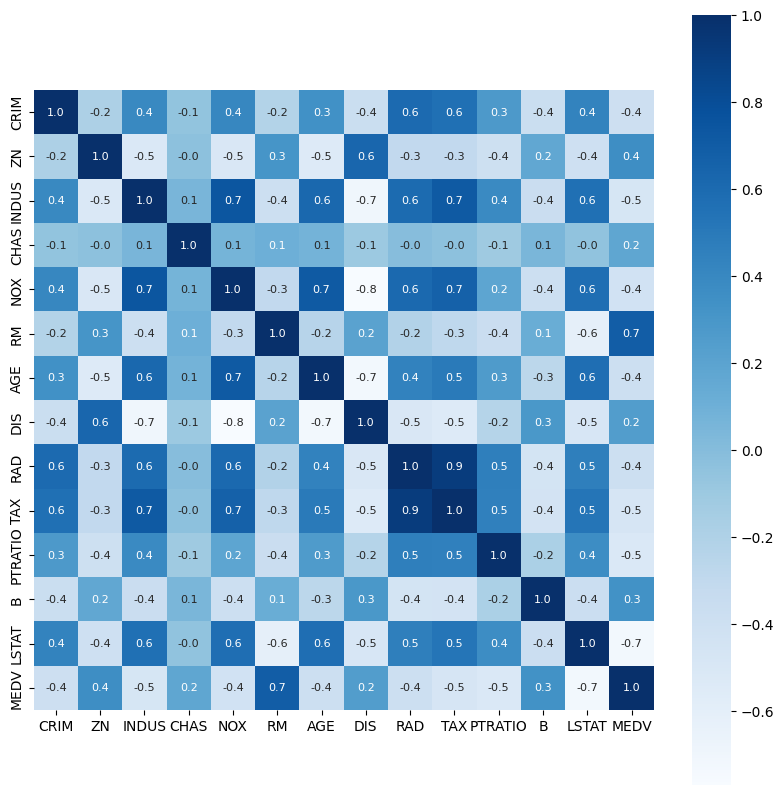

In [ ]:
# constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# splitting the data and Target

In [ ]:
X = Boston_df.drop(['MEDV'], axis=1)   # droping column so axis = 1
Y = Boston_df['MEDV']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

# SPLITTING DATA INTO Training and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# MODEL Training XGBoost Regressor

In [ ]:
# loading the model 
model = XGBRegressor() 

In [ ]:
 # fitting is nothing but training of model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluation

## Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[23.124718  21.00754   20.102568  34.69276   13.904569  13.49714
 21.997927  15.19248   10.902376  22.7026    13.800668   5.5908513
 29.806072  50.005272  34.89682   20.596664  23.386295  19.18905
 32.691494  19.63137   26.9884     8.40349   46.001217  21.7111
 27.08755   19.365828  19.286129  24.817802  22.611925  31.707855
 18.541298   8.704057  17.404493  23.701723  13.304713  10.520918
 12.70769   24.98351   19.686928  14.899053  24.209797  24.994987
 14.897052  17.01417   15.603933  12.6952915 24.52194   15.007025
 49.999977  17.510012  21.203285  32.003624  15.595356  22.898546
 19.32731   18.687641  23.30319   37.200005  30.095251  33.104855
 20.992231  50.002266  13.401404   5.007679  16.5074     8.395711
 28.68154   19.493786  20.596518  45.400917  39.804905  33.41812
 19.840513  33.39644   25.271023  49.998375  12.517453  17.421158
 18.604883  22.601322  50.00689   23.780687  23.312428  23.099342
 41.69992   16.099009  31.596653  36.08056    6.999861  20.382881
 20.000896  11

In [ ]:
# for knowing the error use R squared error
# i just calculate the difference btwn the value predicted by model and original value
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)  # this value shuld be near to 1 if it is morethan 10 or near to it model not performing well
# if 0 then model preforming perfectly
print("Mean Absolute Error : ", score_2)

R squared error :  0.9999970846673867
Mean Absolute Error :  0.010642476601175762


In [ ]:
# accuracy for prediction on testing data
test_data_prediction = model.predict(X_test)

## visualizing the actual and predicted prices

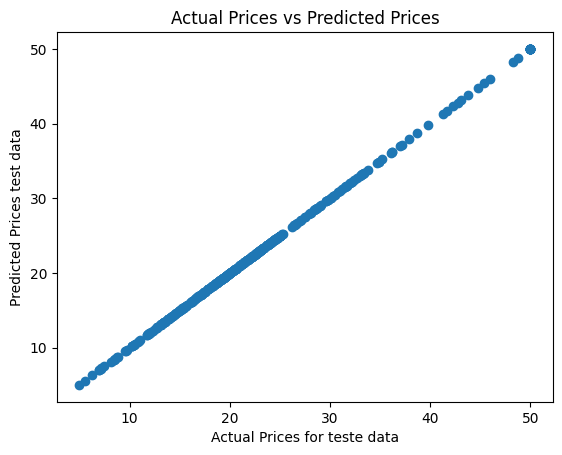

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices for teste data")
plt.ylabel("Predicted Prices test data")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

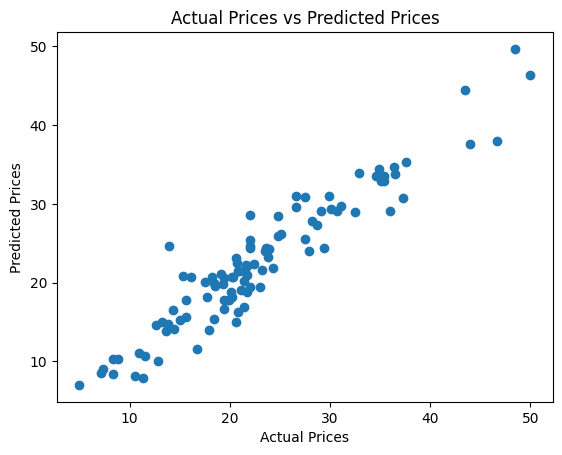

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Finding the error value for test data

In [ ]:
# for knowing the error use R squared error
# i just calculate the difference btwn the value predicted by model and original value
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)  # this value shuld be near to 1 if it is morethan 10 or near to it model not performing well
# if 0 then model preforming perfectly
print("Mean Absolute Error : ", score_2)

R squared error :  0.8950119616414808
Mean Absolute Error :  2.2481449632083668
